In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]
Dl Completed...: 0 url [00:00, ? url/s]
0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]Shuffling and writing examples to /home/lee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNA0AUU/imdb_reviews-train.tfrecord
0 examples [00:00, ? examples/s]Shuffling and writing examples to /home/lee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNA0AUU/imdb_reviews-test.tfrecord
 42%|████▏     | 20906/50000 [00:00<00:00, 209056.21 examples/s]Shuffling and writing examples to /home/lee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNA0AUU/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /home/lee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  

In [25]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 10
embedding_dim = 16
max_length = 120

tokenizer = info.features['text'].encoder

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [26]:
# Single Layer LSTM
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# Multi layer LSTM
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# 1D Convolutional Layer
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
#     tf.keras.layers.Conv1D(128, 5, activation='relu'),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# Model Definition with LSTM

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           130960    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 143,901
Trainable params: 143,901
Non-trainable params: 0
_________________________________________________________________


In [27]:

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

ValueError: in converted code:

    /home/lee/Projects/tf/venv/lib/python3.6/site-packages/tensorflow_core/python/keras/engine/training_v2.py:677 map_fn
        batch_size=None)
    /home/lee/Projects/tf/venv/lib/python3.6/site-packages/tensorflow_core/python/keras/engine/training.py:2410 _standardize_tensors
        exception_prefix='input')
    /home/lee/Projects/tf/venv/lib/python3.6/site-packages/tensorflow_core/python/keras/engine/training_utils.py:573 standardize_input_data
        'with shape ' + str(data_shape))

    ValueError: Error when checking input: expected embedding_5_input to have 2 dimensions, but got array with shape (None, None, None)


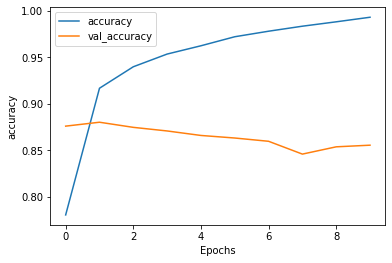

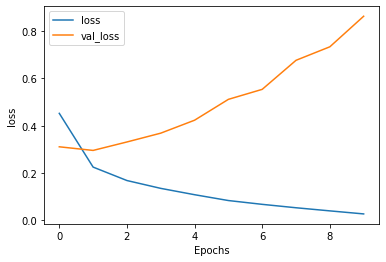

In [19]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')